#Video Games Sales - Análise de exploração de dados

O conjunto de dados tem origem do Kaggle feito atraves de um web scrape de Gregory Smith do VGChartz Video Games Sales. O dataset possui dados de vendas e classificações de jogos de videogame ao redor do mundo. 

Os dados sao

In [ ]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

#Desabilitando avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ps_df = pd.read_csv('PS4_GamesSales.csv' , header=0, encoding='unicode_escape')
xbox_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
sales_df = pd.read_csv('XboxOne_GameSales.csv', header=0, encoding='unicode_escape')

In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [ ]:
xbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [ ]:
ps_df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [ ]:
ps_df.dropna(inplace = True)

In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


In [ ]:
ps_df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
ps_df.groupby(['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20
2019.0,0.00,0.00,0.00,0.00,0.00
2020.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
ps_df.loc[ ( ps_df['Year'] == 2019 ) | ( ps_df['Year'] == 2020 ) ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
732,Brothers in Arms: Furious 4,2019.0,Shooter,Ubisoft,0.0,0.0,0.0,0.0,0.0
778,deep down (Working Title),2020.0,Misc,Capcom,0.0,0.0,0.0,0.0,0.0
782,Whore of the Orient,2020.0,Misc,Warner Bros. Interactive Entertainment,0.0,0.0,0.0,0.0,0.0
784,Final Fantasy (PS4),2020.0,Misc,Square Enix,0.0,0.0,0.0,0.0,0.0
791,Rocketbirds 2: Evolution,2020.0,Misc,Unknown,0.0,0.0,0.0,0.0,0.0
792,Primal Carnage: Genesis,2020.0,Misc,Unknown,0.0,0.0,0.0,0.0,0.0
803,Kingdom Hearts III,2019.0,Role-Playing,Square Enix,0.0,0.0,0.0,0.0,0.0
821,EverQuest Next,2019.0,MMO,Sony Online Entertainment,0.0,0.0,0.0,0.0,0.0
921,Gran Turismo 7,2020.0,Racing,Sony Computer Entertainment,0.0,0.0,0.0,0.0,0.0
933,Wild,2019.0,Adventure,Sony Interactive Entertainment,0.0,0.0,0.0,0.0,0.0


In [71]:
ps_df = ps_df.loc[(ps_df['Year'] != 2019) & (ps_df['Year'] != 2020)]

In [74]:
ps_df['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

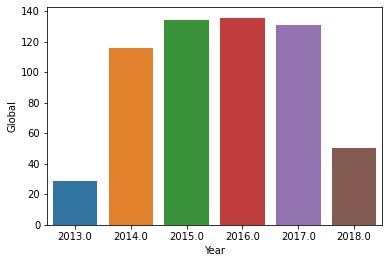

In [72]:
sns.barplot( data=ps_df, x='Year', y='Global', ci=None, estimator = sum) 

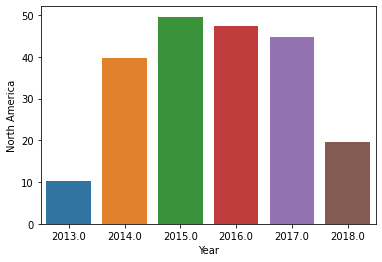

In [73]:
sns.barplot( data=ps_df, x='Year', y='North America', ci=None, estimator = sum) 

Curva de distrbuicao do evento

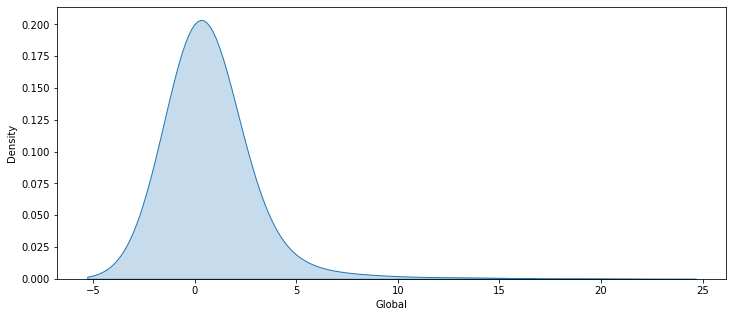

In [79]:
plt.figure(figsize=(12,5))
sns.kdeplot(ps_df['Global'], shade=True, bw=1, linewidth=1)

In [109]:
ps_df.groupby( by=['Year'] ).sum().reset_index()

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


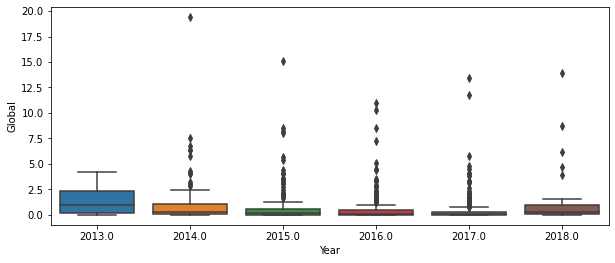

In [86]:
plt.figure(figsize =(10,4))
sns.boxplot( data=ps_df, x='Year', y='Global')

Visualizando os outliers

In [88]:
ps_df.loc[ps_df['Global'] > 7]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [106]:
ps_df.groupby('Publisher').sum()['Global'].sort_values(ascending=False).reset_index()

,Publisher,Global
0,Activision,72.44
1,Ubisoft,59.16
2,Electronic Arts,54.96
3,Sony Interactive Entertainment,54.85
4,EA Sports,47.55
...,...,...
145,Tammeka Games,0.00
146,Taleworlds,0.00
147,Compulsion Games,0.00
148,DMM Games,0.00


In [110]:
analise_df = ps_df.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( analise_df['North America'], analise_df['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( analise_df['Europe'], analise_df['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( analise_df['Japan'], analise_df['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( analise_df['Rest of World'], analise_df['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])